In [1]:
# Importing the Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Loading the Dataset
data = pd.read_csv('linkedin-reviews.csv')

In [5]:
# Analyse the Top 5 rows of the Data
data.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [7]:
# Checking information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


### Exploratory Data Analysis

C:\Users\irt\AppData\Local\Temp\ipykernel_19420\2010005576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'Rating', palette= 'coolwarm')


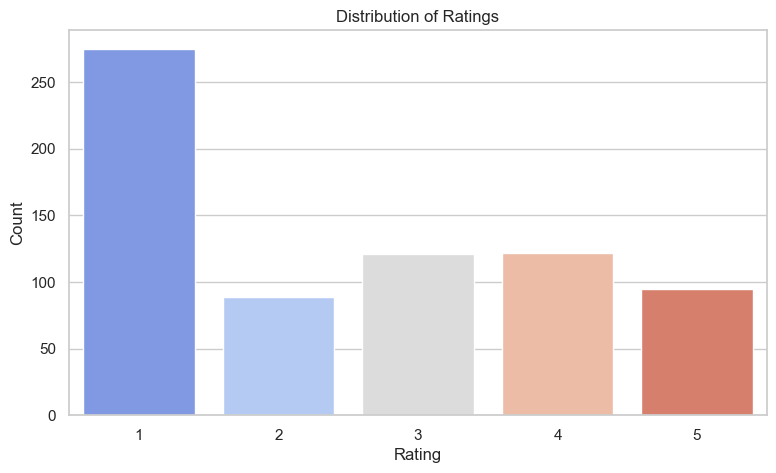

In [18]:
# Plotting the Distribution of the ratings
sns.set(style = 'whitegrid')
plt.figure(figsize = (9, 5))
sns.countplot(data = data, x = 'Rating', palette= 'coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [20]:
# Calculating the length of each review
data['Review Length'] = data['Review'].apply(len)

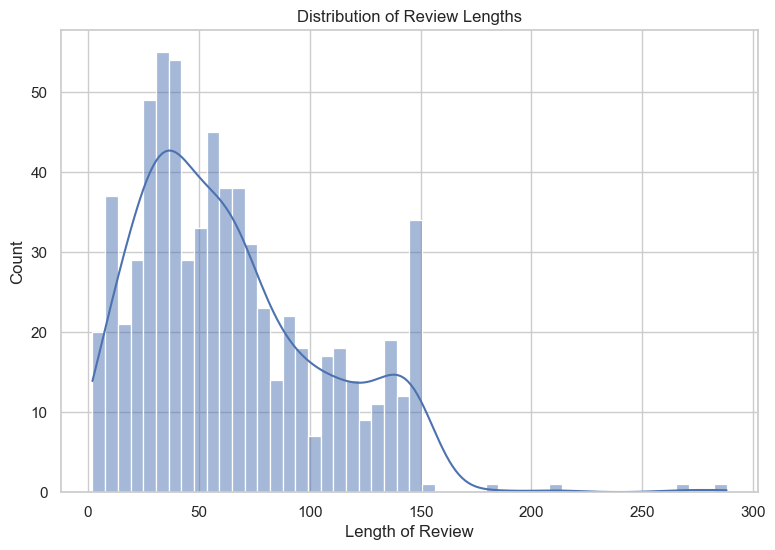

In [24]:
# Plotting the distribution of review lengths
plt.figure(figsize = (9, 6))
sns.histplot(data['Review Length'], bins = 50, kde = True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

### Adding Sentiment Labels in the Data


In [27]:
!pip install textblob

In [29]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
data['Sentiment'] = data['Review'].apply(textblob_sentiment_analysis)
    

In [31]:
# Analyse the Top 5 rows of the Data
data.head()

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


### Analyzing App Reviews Sentiments


In [34]:
# Analyzing the distribution of sentiments
sentiment_distribution = data['Sentiment'].value_counts()

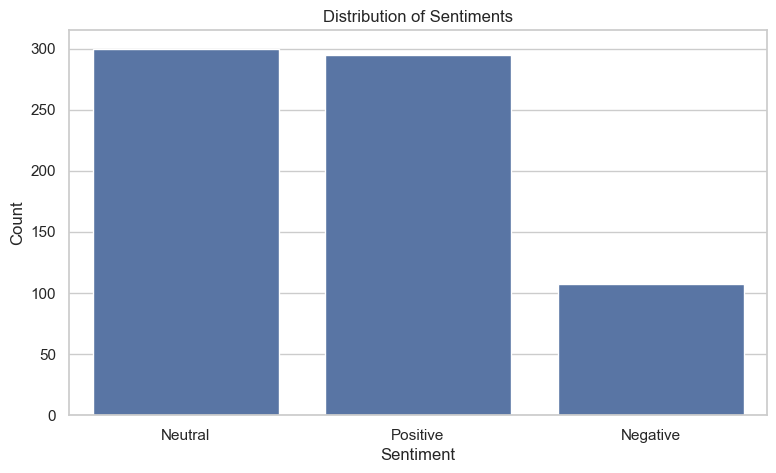

In [36]:
# Plotting the distribution of sentiments
plt.figure(figsize = (9, 5))
sns.barplot(x = sentiment_distribution.index, y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

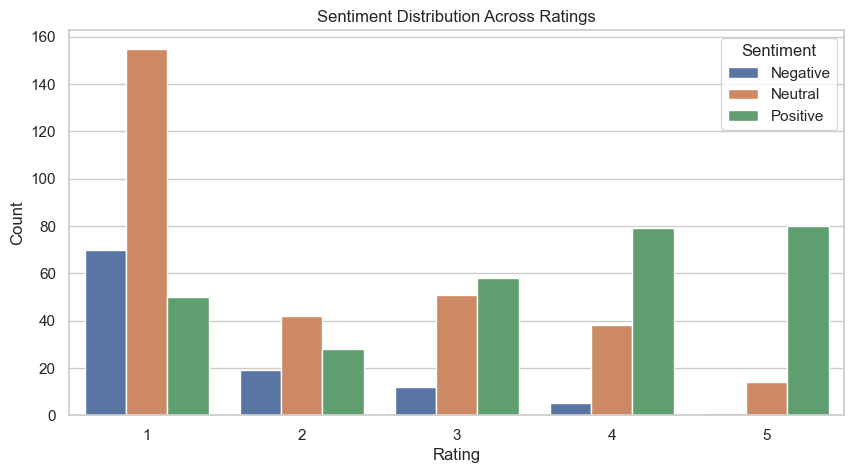

In [42]:
# Now lets explore the relationship between the sentiments and the ratings
plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = 'Rating', hue = 'Sentiment' )
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [44]:
# Now let’s perform a text analysis to identify common words or themes within each sentiment category.
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in data[data['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width = 800, height = 400, background_color= 'white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()
    

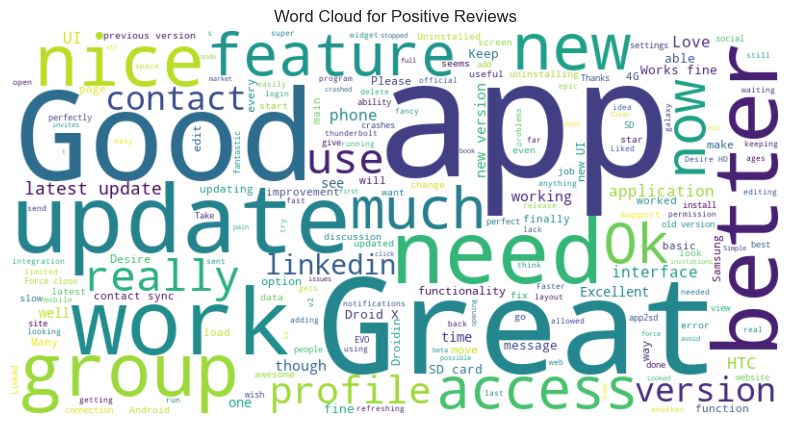

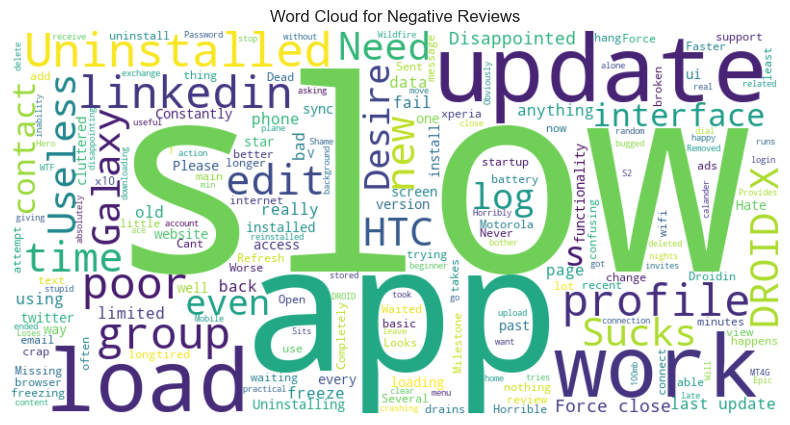

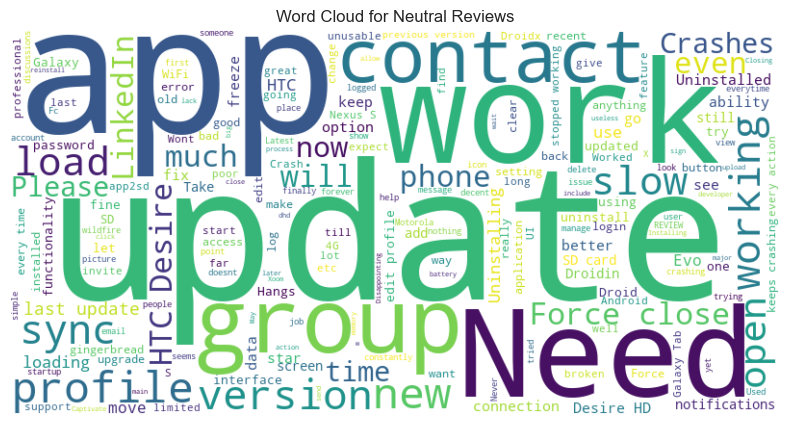

In [48]:
# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

##### Summary
So, App Reviews Sentiment Analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community. It involves using data analysis techniques to determine whether the sentiments in these reviews are positive, negative, or neutral.